In [1]:
import dataset
import seaborn as sns
import matplotlib.pyplot as plt 

          max_temp    mean_temp     min_temp     rainfall     sunshine  \
count  1351.000000  1351.000000  1351.000000  1351.000000  1351.000000   
mean     12.174330     8.548608     4.962087    92.072909   112.937380   
std       4.919959     4.334286     3.816854    38.142766    56.666194   
min       0.100000    -2.100000    -4.500000     9.600000    19.400000   
25%       7.900000     4.800000     1.900000    64.250000    60.400000   
50%      12.100000     8.200000     4.500000    88.900000   110.800000   
75%      16.700000    12.600000     8.500000   114.550000   157.200000   
max      23.300000    17.800000    12.700000   285.200000   446.500000   

         rainydays   prev_month    prev_year  
count  1351.000000  1351.000000  1351.000000  
mean     13.298001    91.998298    91.780311  
std       4.164026    37.949724    37.506543  
min       2.000000     9.600000     9.600000  
25%      10.400000    64.250000    64.300000  
50%      13.300000    88.900000    88.800000  
75% 

In [2]:
data = dataset.dataset
data

,max_temp,mean_temp,min_temp,rainfall,sunshine,rainydays,prev_month,prev_year
Date,,,,,,,,
1910-01-01,5.3,2.5,-0.4,109.1,50.9,17.1,NaN,NaN
1910-02-01,6.8,3.8,0.7,122.6,72.2,20.6,109.1,NaN
1910-03-01,9.0,5.2,1.4,49.7,130.3,8.2,122.6,NaN
1910-04-01,9.8,5.9,2.0,93.4,122.8,16.2,49.7,NaN
1910-05-01,14.3,9.9,5.5,70.0,190.5,14.8,93.4,NaN
...,...,...,...,...,...,...,...,...
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,240.8,51.9
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.2
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.5


In [3]:
data.dropna(axis=0)

,max_temp,mean_temp,min_temp,rainfall,sunshine,rainydays,prev_month,prev_year
Date,,,,,,,,
1911-01-01,5.80,3.30,0.80,58.5,46.1,10.4,140.0,109.1
1911-02-01,6.90,3.80,0.70,98.1,60.4,13.5,58.5,122.6
1911-03-01,7.20,4.20,1.10,61.8,102.0,12.7,98.1,49.7
1911-04-01,10.20,6.50,2.70,68.9,126.2,11.6,61.8,93.4
1911-05-01,16.40,11.40,6.50,51.8,208.1,8.0,68.9,70.0
...,...,...,...,...,...,...,...,...
2023-03-01,8.90,5.70,2.40,132.0,81.1,20.4,43.4,50.7
2023-04-01,11.90,7.80,3.70,69.8,158.2,12.2,132.0,49.8
2023-05-01,16.20,11.60,7.00,39.0,207.2,7.3,69.8,77.5


In [4]:
data.corr()

,max_temp,mean_temp,min_temp,rainfall,sunshine,rainydays,prev_month,prev_year
max_temp,1.000000,0.994854,0.973271,-0.216055,0.789044,-0.252899,-0.377761,-0.201497
mean_temp,0.994854,1.000000,0.991448,-0.159705,0.731137,-0.204076,-0.348601,-0.171280
min_temp,0.973271,0.991448,1.000000,-0.084693,0.646247,-0.137733,-0.305669,-0.129910
rainfall,-0.216055,-0.159705,-0.084693,1.000000,-0.454937,0.925245,0.226169,0.264645
sunshine,0.789044,0.731137,0.646247,-0.454937,1.000000,-0.410684,-0.419994,-0.367684
rainydays,-0.252899,-0.204076,-0.137733,0.925245,-0.410684,1.000000,0.195322,0.180392
prev_month,-0.377761,-0.348601,-0.305669,0.226169,-0.419994,0.195322,1.000000,0.163429
prev_year,-0.201497,-0.171280,-0.129910,0.264645,-0.367684,0.180392,0.163429,1.000000


In [5]:
data.describe()

,max_temp,mean_temp,min_temp,rainfall,sunshine,rainydays,prev_month,prev_year
count,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1356.000000
mean,12.169274,8.544365,4.958019,92.090169,112.906750,13.309171,92.090169,91.875369
std,4.917175,4.332615,3.816550,38.109847,56.598913,4.168325,38.109847,37.546898
min,0.100000,-2.100000,-4.500000,9.600000,19.400000,2.000000,9.600000,9.600000
25%,7.900000,4.800000,1.900000,64.300000,60.550000,10.400000,64.300000,64.300000
50%,12.100000,8.200000,4.500000,89.000000,110.800000,13.400000,89.000000,88.950000
75%,16.700000,12.600000,8.500000,114.950000,156.950000,16.150000,114.950000,114.400000
max,23.300000,17.800000,12.700000,285.200000,446.500000,39.800000,285.200000,216.900000


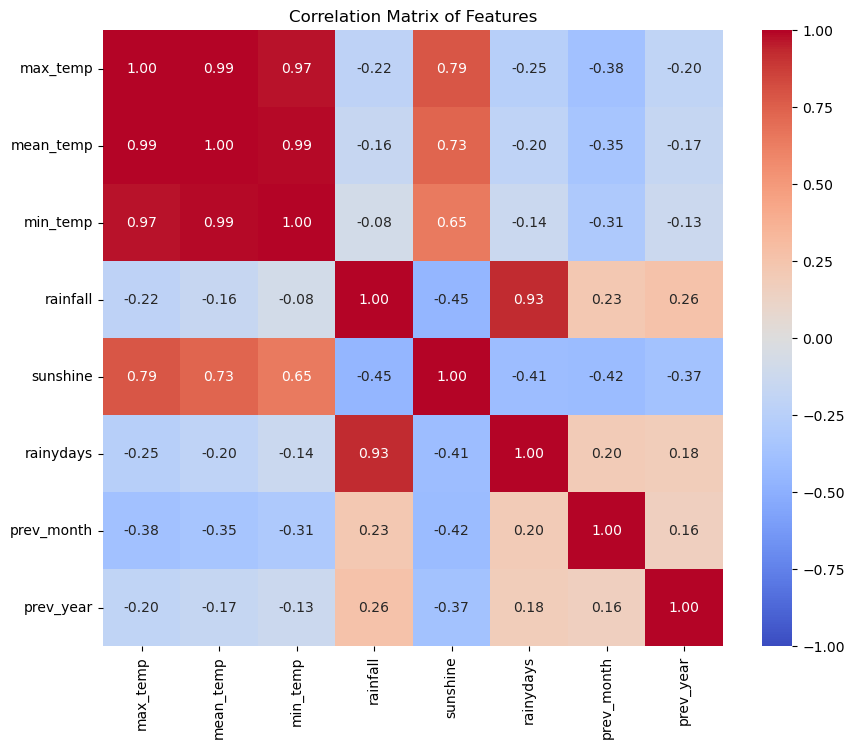

In [6]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

In [7]:
data.corrwith(data['rainfall'])

max_temp     -0.216055
mean_temp    -0.159705
min_temp     -0.084693
rainfall      1.000000
sunshine     -0.454937
rainydays     0.925245
prev_month    0.226169
prev_year     0.264645
dtype: float64

<AxesSubplot:xlabel='Date'>

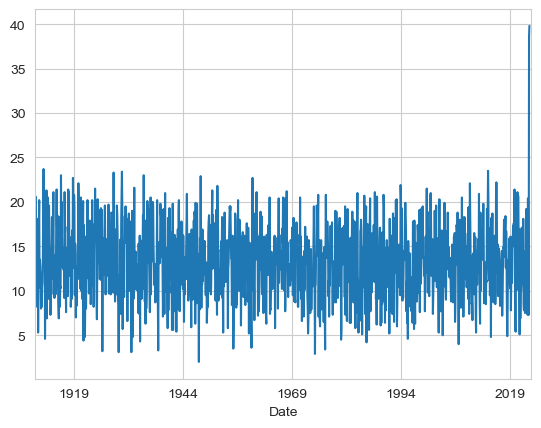

In [10]:
data['rainydays'].plot()

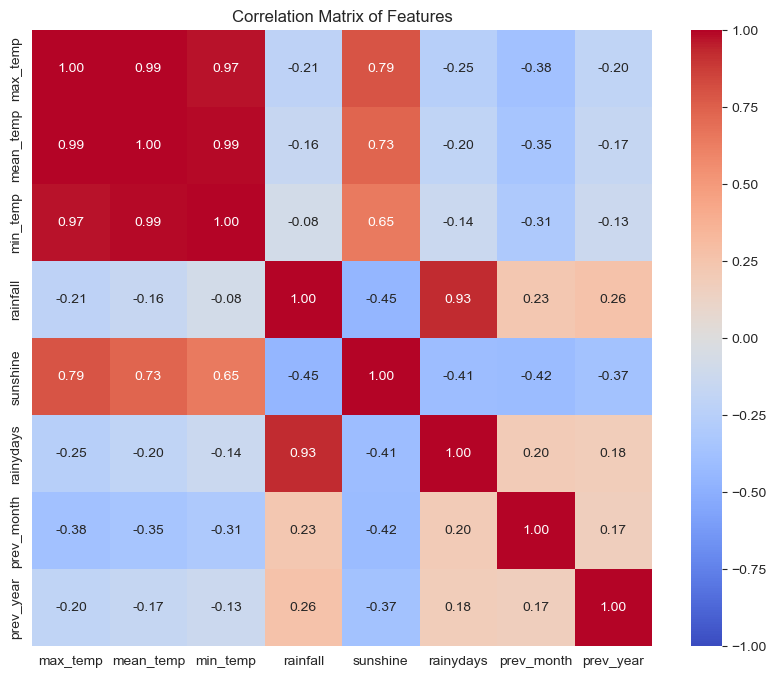

In [12]:
corr_matrix = dataset.df.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

In [15]:
dataset.df.corrwith(data['rainfall'])

max_temp     -0.214826
mean_temp    -0.158495
min_temp     -0.083462
rainfall      1.000000
sunshine     -0.454169
rainydays     0.925624
prev_month    0.228400
prev_year     0.264645
dtype: float64